# First Day Data Science with Python  
Author: Dr. Amish Mishra  
Course: MAT 311  
Updated: August 1, 2024

Welcome to your first day of learning data science with Python! Today, we'll be exploring the Credit Card Fraud Detection dataset. By the end of this notebook, you'll have a basic understanding of how to wrangle, explore, and model data to provide valuable business insights. The purpose is to give you a taste of what this whole semester is about in just the first day!

## Data Context
The data was downloaded from https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud/data. They claim that the data came from an unamed institute.

The data consists of the following columns:

| Feature                            | Explanation                                                      |
|------------------------------------|------------------------------------------------------------------|
| distance_from_home                 | The distance from home where the transaction happened.           |
| distance_from_last_transaction     | The distance from the last transaction.                          |
| ratio_to_median_purchase_price     | Ratio of purchased price transaction to median purchase price.   |
| repeat_retailer                    | Is the transaction from the same retailer.                       |
| used_chip                          | Is the transaction through chip (credit card).                   |
| used_pin_number                    | Is the transaction done using a PIN number.                      |
| online_order                       | Is the transaction an online order.                              |
| fraud                              | Is the transaction fraudulent.                                   |

## Load necessary libraries

In [1]:
# For working with data
import pandas as pd

# For visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# For machine learning modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

## Load the Data

In [2]:
# Load the Credit Card Fraud Detection dataset (assuming it's in the same directory as this notebook)
file_path = "card_transdata.csv"
transaction_data_raw = pd.read_csv(file_path)

# Display the first few rows of the dataset and general information
transaction_data_raw.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0
1,10.829943,0.175592,1.294219,1.0,NaN,0.0,0.0,0
2,5.091079,NaN,0.427715,1.0,0.0,0.0,1.0,0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0


In [3]:
transaction_data_raw.shape

(999, 8)

In [4]:
transaction_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   distance_from_home              999 non-null    float64
 1   distance_from_last_transaction  996 non-null    float64
 2   ratio_to_median_purchase_price  997 non-null    float64
 3   repeat_retailer                 992 non-null    float64
 4   used_chip                       995 non-null    float64
 5   used_pin_number                 997 non-null    float64
 6   online_order                    995 non-null    float64
 7   fraud                           999 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 62.6 KB


In [5]:
transaction_data_raw.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,999.000000,996.000000,997.000000,992.000000,995.000000,997.000000,995.000000,999.000000
mean,26.876607,5.437319,1.655069,0.892137,0.313568,0.117352,0.673367,0.079079
std,63.899697,35.668094,2.351386,0.310364,0.464176,0.322001,0.469218,0.269997
min,0.104184,0.001448,0.016933,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.990543,0.306441,0.468123,1.000000,0.000000,0.000000,0.000000,0.000000
50%,10.340321,0.958539,0.955504,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.393952,3.137259,1.922025,1.000000,1.000000,0.000000,1.000000,0.000000
max,965.910612,990.070315,36.074366,1.000000,1.000000,1.000000,1.000000,1.000000


## Data Wrangling


In [6]:
# Check for missing values
transaction_data_raw.isnull().sum()

distance_from_home                0
distance_from_last_transaction    3
ratio_to_median_purchase_price    2
repeat_retailer                   7
used_chip                         4
used_pin_number                   2
online_order                      4
fraud                             0
dtype: int64

Since there are missing values, we must decide what to do about them. One option is to drop any row that has a null value. In this case, since the number of rows we would drop is a small proportion out of the total number of rows in the dataset, it's not a big deal to drop them.

In [7]:
# Drop rows with null values
transaction_data_cleaned = transaction_data_raw.dropna().copy()
print(transaction_data_cleaned.shape)

(977, 8)


In [8]:
# Display the first few rows of the cleaned DataFrame
transaction_data_cleaned.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0
5,5.586408,13.261073,0.064768,1.0,0.0,0.0,0.0,0
6,3.724019,0.956838,0.278465,1.0,0.0,0.0,1.0,0


## Visualize the Data


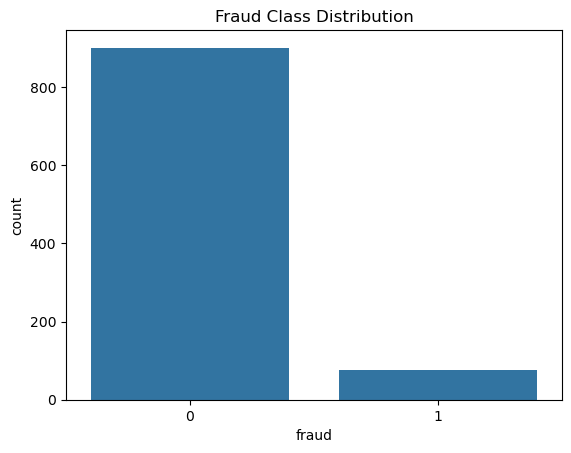

In [9]:
# Visualize the class distribution
sns.countplot(x='fraud', data=transaction_data_cleaned)
plt.title('Fraud Class Distribution')
plt.show()

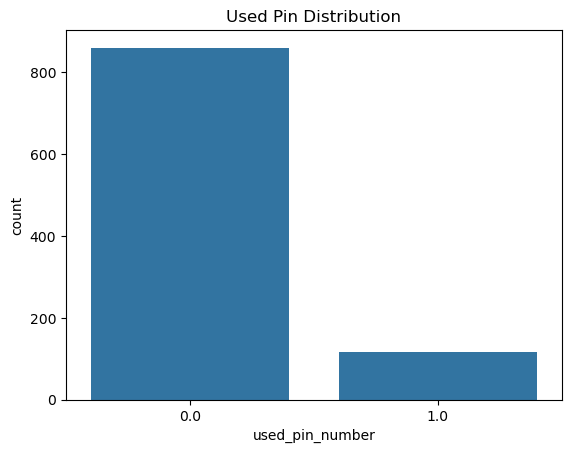

In [10]:
# Visualize the used pin number distribution
sns.countplot(x='used_pin_number', data=transaction_data_cleaned)
plt.title('Used Pin Distribution')
plt.show()

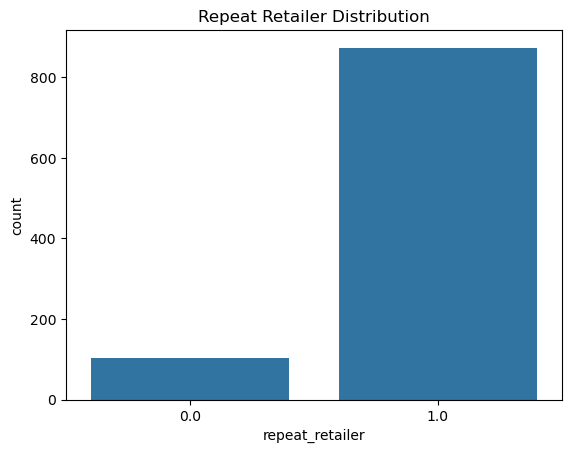

In [11]:
# Visualize the repeat retailer distribution
sns.countplot(x='repeat_retailer', data=transaction_data_cleaned)
plt.title('Repeat Retailer Distribution')
plt.show()

In [12]:
# Visualize the online order distribution
# YOUTRY: copy the code from above and make bar graphs of how many transactions were online orders and how many were not

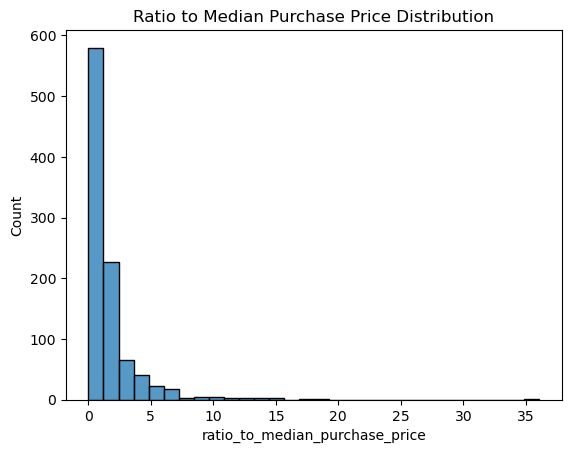

In [13]:
# Visualize the distribution of 'ratio_to_median_purchase_price'
sns.histplot(transaction_data_cleaned['ratio_to_median_purchase_price'], bins=30)
plt.title('Ratio to Median Purchase Price Distribution')
plt.show()

In [14]:
# Visualize the distribution of 'distance_from_home'
# YOUTRY: copy the code from above and make a histogram of the distance_from_home column

## Better Visualizations: Bivariate Visualizations  
What would really help is to know how fradulent and non-fradulent transactions breakdown each variable.  

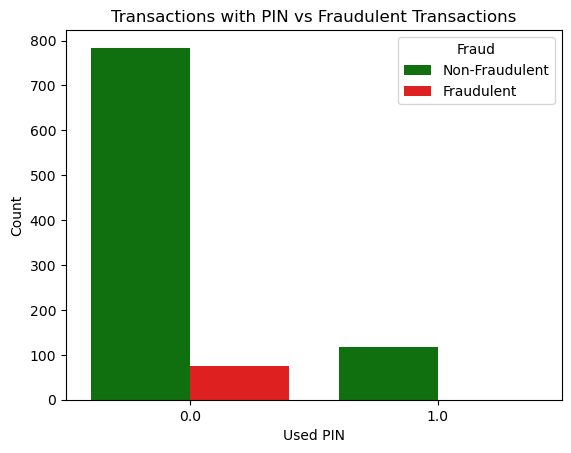

In [15]:
sns.countplot(data=transaction_data_cleaned, x='used_pin_number', hue='fraud', palette=['green', 'red'])
plt.title('Transactions with PIN vs Fraudulent Transactions')
plt.xlabel('Used PIN')
plt.ylabel('Count')
plt.legend(title='Fraud', labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()

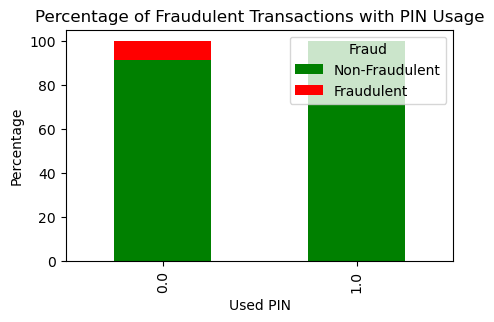

In [16]:
# Create a percentage plot to show the percentage of fraudulent transactions when a PIN was used or not
df_pin_fraud = transaction_data_cleaned.groupby('used_pin_number')['fraud'].value_counts(normalize=True).unstack() * 100

df_pin_fraud.plot(kind='bar', stacked=True, color=['green', 'red'], figsize=(5, 3))
plt.title('Percentage of Fraudulent Transactions with PIN Usage')
plt.xlabel('Used PIN')
plt.ylabel('Percentage')
plt.legend(title='Fraud', labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()

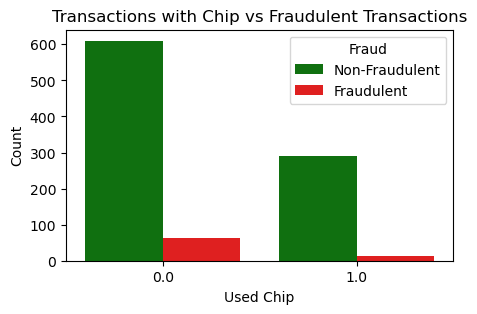

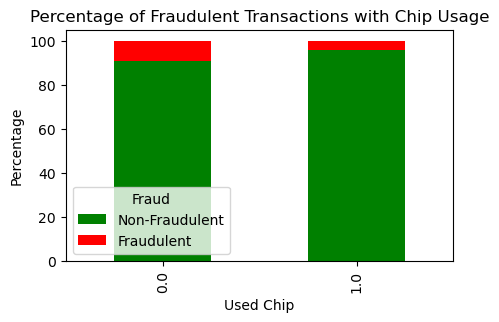

In [17]:
# Create a count plot to show the number of transactions that were fraudulent vs non-fraudulent when a chip was used or not
plt.figure(figsize=(5, 3))
sns.countplot(data=transaction_data_cleaned, x='used_chip', hue='fraud', palette=['green', 'red'])
plt.title('Transactions with Chip vs Fraudulent Transactions')
plt.xlabel('Used Chip')
plt.ylabel('Count')
plt.legend(title='Fraud', labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()

# Create a percentage plot to show the percentage of fraudulent transactions when a chip was used or not
df_chip_fraud = transaction_data_cleaned.groupby('used_chip')['fraud'].value_counts(normalize=True).unstack() * 100

df_chip_fraud.plot(kind='bar', stacked=True, color=['green', 'red'], figsize=(5, 3))
plt.title('Percentage of Fraudulent Transactions with Chip Usage')
plt.xlabel('Used Chip')
plt.ylabel('Percentage')
plt.legend(title='Fraud', labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()

In [18]:
# YOUTRY: Fill in the blanks yourself to show the number of transactions that were fraudulent vs non-fraudulent when it was an online order or not

# Create a count plot
plt.figure(figsize=(5, 3))
sns.countplot(data=__________, x=__________, hue=__________, palette=['green', 'red'])
plt.title('Transactions with Online Order vs Fraudulent Transactions')
plt.xlabel('Online Order')
plt.ylabel('Count')
plt.legend(title='Fraud', labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()

# Create a percentage plot to show the percentage of fraudulent transactions when it was an online order or not
df_online_order_fraud = transaction_data_cleaned.groupby('online_order')['fraud'].value_counts(normalize=True).unstack() * 100

df_online_order_fraud.plot(kind='bar', stacked=True, color=['green', 'red'], figsize=(10, 6))
plt.title('Percentage of Fraudulent Transactions with Online Order')
plt.xlabel('Online Order')
plt.ylabel('Percentage')
plt.legend(title='Fraud', labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()

NameError: name '__________' is not defined

<Figure size 500x300 with 0 Axes>

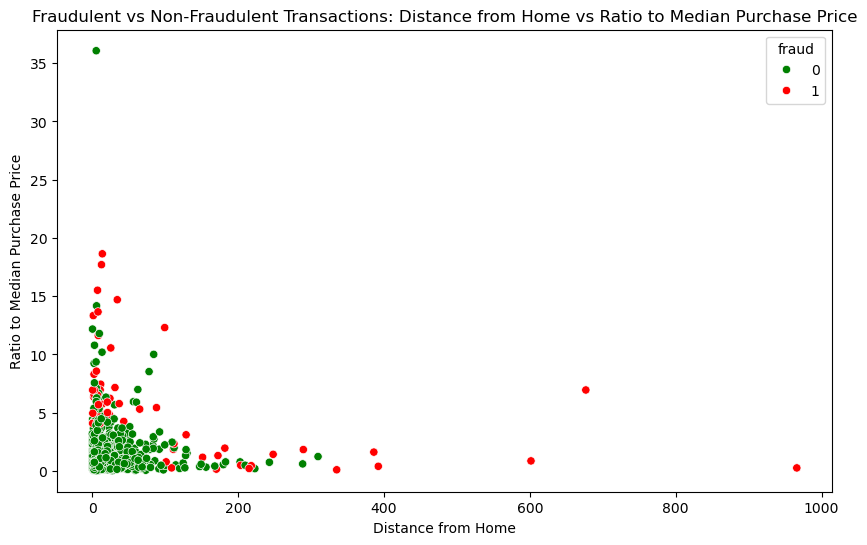

In [ ]:
# Create a scatter plot to show the breakdown of fraudulent and non-fraudulent transactions
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=transaction_data_cleaned,
    x='distance_from_home',
    y='ratio_to_median_purchase_price',
    hue='fraud',
    palette={0: 'green', 1: 'red'},
)
plt.title('Fraudulent vs Non-Fraudulent Transactions: Distance from Home vs Ratio to Median Purchase Price')
plt.xlabel('Distance from Home')
plt.ylabel('Ratio to Median Purchase Price')
plt.show()

In [ ]:
# YOUTRY: Create a scatter plot to show the breakdown of fraudulent and non-fraudulent transactions for distance_from_last_transaction vs ratio_to_median_purchase_price
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=transaction_data_cleaned,
    x='distance_from_last_transaction',
    y=________,
    hue=_____,
    palette={0: 'green', 1: 'red'},
)
plt.title('Fraudulent vs Non-Fraudulent Transactions: Distance from Last Transaction vs Ratio to Median Purchase Price')
plt.xlabel('Distance from Last Transaction')
plt.ylabel('Ratio to Median Purchase Price')
plt.show()

NameError: name '________' is not defined

<Figure size 1000x600 with 0 Axes>

-----
## Can we predict if a transaction is a fraud?
Let's start by saving 20% of our data to make our predictions on. We will learn from 80% of the data called X_train and y_train.

In [19]:
# Select features and target variable
X = transaction_data_cleaned.drop('fraud', axis=1)
y = transaction_data_cleaned['fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

In [20]:
# In a notebook like this, you can just type in a variable by itself in a cell and it will print out below
X_train

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
954,39.904167,0.367448,0.260833,1.0,1.0,0.0,1.0
143,2.660649,0.657162,3.837860,1.0,0.0,0.0,1.0
643,48.902727,0.205816,1.307000,1.0,0.0,1.0,0.0
15,179.665148,0.120920,0.535640,1.0,1.0,1.0,1.0
793,676.702348,1.209733,6.948586,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
685,5.916343,5.099247,0.419779,1.0,0.0,0.0,0.0
722,23.517527,3.513485,0.241444,1.0,0.0,0.0,0.0
173,3.273426,1.056948,1.694281,1.0,0.0,0.0,1.0
499,7.387696,1.598827,0.847218,1.0,0.0,0.0,1.0


In [21]:
y_train

954    0
143    0
643    0
15     0
793    1
      ..
685    0
722    0
173    0
499    0
593    0
Name: fraud, Length: 781, dtype: int64

In [22]:
# YOUTRY: print out the testing data set below. How many transactions are in the testing set?

## Never Fraud Model  
This model always says that a transaction is not a fraud


In [23]:
# Never Fraud Model
y_pred_never_fraud = [0] * len(y_test)

# Print just the first 100 predictions
print(y_pred_never_fraud[:100]) # Notice how all predictions are always 0, non-fradulent

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### Model Evaluation
Notice that the Never Fraud model gets over 90% accuracy! Wow!

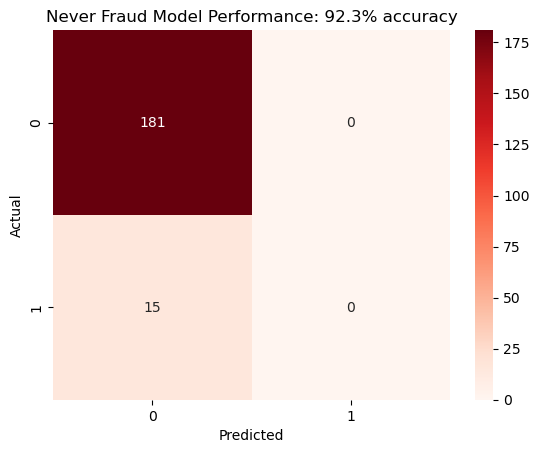

In [24]:
# Confusion matrix for Never Fraud Model
conf_matrix_never_fraud = confusion_matrix(y_test, y_pred_never_fraud)
acc = round(100*accuracy_score(y_test, y_pred_never_fraud),1)
sns.heatmap(conf_matrix_never_fraud, annot=True, fmt='d', cmap='Reds', cbar=True)
plt.title(f'Never Fraud Model Performance: {acc}% accuracy')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Basic Modeling with k-NN

![knn gif](knn_slow.gif)  
GIF credit to Aryan Raj on https://github.com/aryanraj2713/KNN-visualization

In [25]:
# Train a k-NN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test)

# Print just the first 100 predictions
print(y_pred_knn[:100]) # Notice how some predictions are 1, fradulent!

[0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]


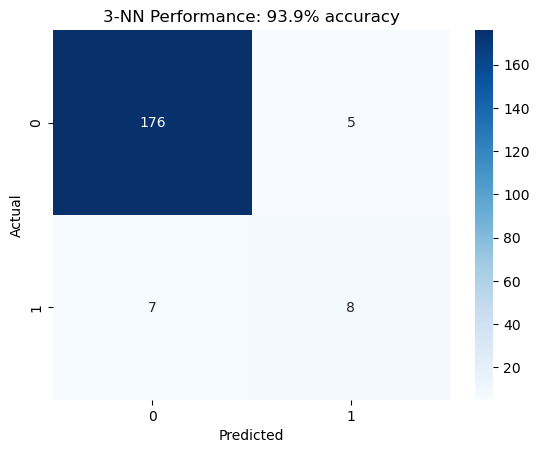

In [26]:
# Confusion matrix for k-NN
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
acc = round(100*accuracy_score(y_test, y_pred_knn),1)
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title(f'3-NN Performance: {acc}% accuracy')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Comparison of Model Performance


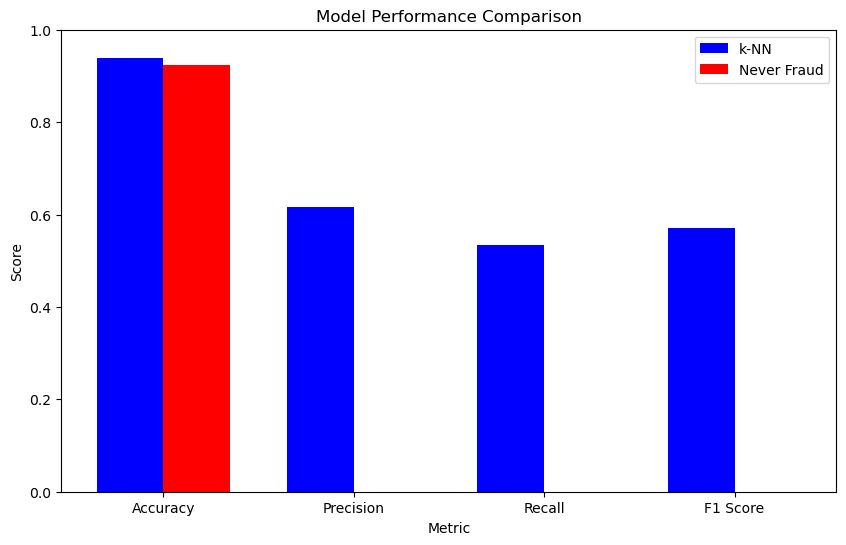

In [27]:
# Compute metrics for "Never Fraud"
accuracy_never_fraud = accuracy_score(y_test, y_pred_never_fraud)
precision_never_fraud = precision_score(y_test, y_pred_never_fraud, zero_division=0)
recall_never_fraud = recall_score(y_test, y_pred_never_fraud)
f1_never_fraud = f1_score(y_test, y_pred_never_fraud)

# Compute metrics for k-NN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

# Prepare data for visualization
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
knn_scores = [accuracy_knn, precision_knn, recall_knn, f1_knn]
never_fraud_scores = [accuracy_never_fraud, precision_never_fraud, recall_never_fraud, f1_never_fraud]

comparison_transaction_data = pd.DataFrame({
    'Metric': metrics,
    'k-NN': knn_scores,
    'Never Fraud': never_fraud_scores
})

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = range(len(metrics))

bar1 = ax.bar(index, knn_scores, bar_width, label='k-NN', color='blue')
bar2 = ax.bar([i + bar_width for i in index], never_fraud_scores, bar_width, label='Never Fraud', color='red')

ax.set_xlabel('Metric')
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1)
ax.legend()

## Use the best model for prediction
Classify each of the following as fradulent or not:
- "A customer made a credit card purchase 350 miles from their home and 0 miles from their last transaction, spending 1.1 times their median purchase price at a retailer they’ve shopped at before. The transaction was completed in-person, without using a chip but with a PIN number. Is this transaction fradulent?"

- "A customer made a credit card purchase 30 miles from their home and 15 miles from their last transaction, spending 2.5 times their median purchase price at a retailer they’ve not shopped at before. The transaction was completed in-person, without using a chip and without a PIN number. Is this transaction fradulent?"

## 3D Visualization of k-NN Prediction (BONUS)
Here, we plot just 3 of the variables from the dataset and see if we can discriminate between fradulent and non-fraudulent transactions


In [28]:
# Add two new transactions to the dataframe for plotting purposes
new_transactions = pd.DataFrame({
    'ratio_to_median_purchase_price': [5, 2.5],
    'distance_from_last_transaction': [0, 15],
    'distance_from_home': [600, 30],
    'fraud_name': ['New Transaction 1', 'New Transaction 2']
})

# Map existing 'fraud' values to descriptive labels
transaction_data_cleaned['fraud_name'] = transaction_data_cleaned['fraud'].map({0: 'Non-Fraudulent', 1: 'Fraudulent'})

# Append the new transactions to the original dataframe
transaction_data_extended = pd.concat([transaction_data_cleaned, new_transactions], ignore_index=True)

# Create a 3D scatter plot using Plotly Express
fig = px.scatter_3d(
    transaction_data_extended,
    x='ratio_to_median_purchase_price',
    y='distance_from_last_transaction',
    z='distance_from_home',
    color='fraud_name',
    color_discrete_map={
        'Non-Fraudulent': 'green',
        'Fraudulent': 'red',
        'New Transaction 1': 'blue',
        'New Transaction 2': 'orange'
    },
    title='3D Visualization of k-NN Prediction',
    labels={
        'ratio_to_median_purchase_price': 'Ratio to Median Purchase Price',
        'distance_from_last_transaction': 'Distance From Last Transaction',
        'distance_from_home': 'Distance From Home',
        'fraud_name': 'Transaction Type'
    }
)

# Update marker sizes
fig.update_traces(marker=dict(size=3), selector=dict(name='Non-Fraudulent'))
fig.update_traces(marker=dict(size=3), selector=dict(name='Fraudulent'))
fig.update_traces(marker=dict(size=6), selector=dict(name='New Transaction 1'))
fig.update_traces(marker=dict(size=6), selector=dict(name='New Transaction 2'))

# Update layout to make the plot window longer
fig.update_layout(
    width=1000,  # Set the width of the plot
    height=800,  # Set the height of the plot
    scene=dict(
        xaxis_title='Ratio to Median Purchase Price',
        yaxis_title='Distance From Last Transaction',
        zaxis_title='Distance From Home'
    ),
    title='3D Visualization of k-NN Prediction',
    legend_title_text='Legend'
)

fig.show()